<a href="https://colab.research.google.com/github/Patilla4puto/Intro_to_ml-tokio_school/blob/master/soluciones/03-1-Regresion_lineal_simple-Ajuste_por_minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal simple: Ajuste por mínimos cuadrados

## ¿Qué vamos a hacer?
- Importar datasets en el entorno de trabajo
- Ajustar una regresión lineal simple por mínimos cuadrados de forma manual
- Resolver dicha regresión usando funciones matemáticas de Numpy
- Visualizar la regresión con Matplotlib

## Tarea 1: Importar datasets

Para este ejercicio debemos importar los siguientes datasets al entorno local, que usamos en un ejercicio anterior y estarán disponibles en dicha unidad:
- modulo1-unidad1-ejercicio1-dataset-tarea2.csv
- modulo1-unidad1-ejercicio1-dataset-tarea3.csv

En función de tu entorno de trabajo, tendrás que seguir pasos diferentes para importarlos. Puedes importarlos tanto en Google Colab como en tu VM, usando la interfaz de JupyterLab o usando las funcionalidades de tu VM.
Como los entornos son tan diferentes, no incluimos instrucciones paso a paso para ello, pero no debes tener dificultad ninguna para hacerlo :).

Tómate este tiempo para familiarizarte con tu entorno de trabajo y descubrir las opciones para importar datasets locales.

**Nota:** Asegúrate de que los importas o que los mueves posteriormente al directorio de soluciones, en la carpeta para esta unidad/sesión.

## Tarea 2: Ajustar la regresión lineal simple por mínimos cuadrados

Para esta tarea, vamos a ajustar la regresión paso a paso, calculando cada valor con Numpy para familiarizarnos con sus funciones.

**Nota:** Vamos a utilizar únicamente la función de suma de Numpy. En la siguiente tarea usaremos las funciones para calcular directamente la media de un array, desviaciones típicas o covarianza.

In [1]:
import numpy as np

### Importar el dataset en Numpy

Ejecuta la siguiente celda para importar el dataset com un array de Numpy, asegurándote de que el nombre del dataset es correcto y que el archivo se encuentra en el mismo directorio que el notebook.

In [4]:
import csv

with open('M1_U1_Ej1_dataset-tarea2.csv') as csvfile:
    #dataset1 = np.asarray(list(csv.reader(csvfile))[1:])
    read_csv = list(csv.reader(csvfile))
    
# Eliminar cabecera
read_csv = read_csv[1:]

# Cambiar caracter decimal de comas a puntos
for line in read_csv:
    for i in [0, 1]:
        line[i] = line[i].replace(',', '.')
    
    
# Cargar como array de Numpy
dataset1 = np.asarray(read_csv).astype(np.float)

print(dataset1)

[[  0.    34.64]
 [  2.    25.59]
 [  4.    28.52]
 [  6.    40.42]
 [  8.    11.12]
 [ 10.    61.2 ]
 [ 12.    44.1 ]
 [ 14.    73.33]
 [ 16.    56.14]
 [ 18.    57.83]
 [ 20.    50.74]
 [ 22.    90.15]
 [ 24.   100.63]
 [ 26.    83.65]
 [ 28.   103.47]
 [ 30.    89.48]
 [ 32.   128.12]
 [ 34.   140.35]
 [ 36.   137.97]
 [ 38.   122.06]
 [ 40.   118.24]
 [ 42.   146.39]
 [ 44.   138.15]
 [ 46.   158.85]
 [ 48.   135.65]
 [ 50.   187.84]]


Ya disponemos de los datos en un array 2D de Numpy.

Ahora, completa el código de las siguientes celdas para ajustar la regresión lineal:

In [6]:
## TODO: Crea 2 arrays 1D a partir del dataset importado que correspondan a las columnas X e Y del CSV

X = dataset1[... , 0]
Y = dataset1[... , 1]
print(X)
print(Y)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]
[ 34.64  25.59  28.52  40.42  11.12  61.2   44.1   73.33  56.14  57.83
  50.74  90.15 100.63  83.65 103.47  89.48 128.12 140.35 137.97 122.06
 118.24 146.39 138.15 158.85 135.65 187.84]


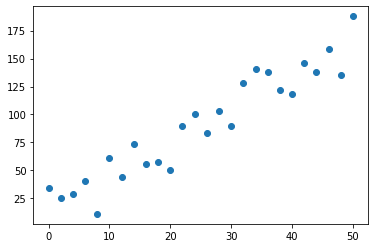

In [ ]:
## TODO: Antes de entrenar el modelo, representa los datos en una gráfica de puntos de Matplotlib

import matplotlib.pyplot as plt

# Puedes usar la función scatter()
plt.scatter(X,Y)

plt.show()

Recuerda las ecuaciones de la regresión lineal:
$Y = m \times X + b$

$m=\frac{\sum xy-\frac{(\sum x)(\sum y)}{n}}{\sum x^2-\frac{(\sum x)^2}{n}}$

$b=\overline{y}-m\times\overline{x}$

In [29]:
## TODO: Calcula m usando la función np.sum(ndarray) o ndarray.sum(), donde ndarray es el array a sumar
n = len(X)
sum_Y = np.sum(Y)
sum_X = np.sum(X)
XY = np.multiply(X,Y)    # Recuerda, es una multiplicación de vectores elemento-a-elemento. Usa la función np.multiply()
X2 = np.square(X)

m = (np.sum(XY)-sum_X*sum_Y/n)/(np.sum(X2)-pow(sum_X,2)/n)


In [35]:
## TODO: Calcula b

# TODO: Sustituye "sum_y" y "sum_x" por el código o variables correspondientes
y_avg = sum_Y / n
x_avg = sum_X / n

b = y_avg-x_avg*m

Evalúa el modelo calculando su R2.

Recuerda las ecuaciones para calcular el coeficiente de correlación:

$R^2 = \frac{\sigma_{xy}}{\sigma_x \cdot \sigma_y}$

$\sigma_{xy} = \frac{\overline{x \cdot y}}{n}$

$\sigma_x = \sqrt{\frac{\sum x^2}{n} - \bar{x}^2}$

In [64]:
## TODO: Calcula r2
import math as m
x_std = m.sqrt(np.sum(X2)/n-x_avg**2)
y_std = m.sqrt(np.sum(np.square(Y))/n-y_avg**2)
cov_xy = np.sum(XY)/n-x_avg*y_avg

r2 = cov_xy/(x_std*y_std)

Calcula las predicciones de Y como *y_pred* para los valores de X originales, con los coeficientes del modelo ajustado:

$y\_pred = m \times X + b$

In [ ]:
## TODO: Calcula y_pred
y_pred = m*X+b

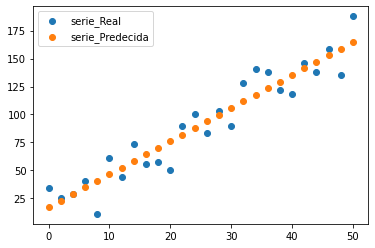

In [ ]:
# TODO: Representa con Matplotlib una gráfica con 2 series en colores diferentes: Y vs X, y_pred vs X

import matplotlib.pyplot as plt
plt.scatter(X,Y,label = 'serie_Real')
plt.scatter(X,y_pred, label = 'serie_Predecida')
plt.legend()
plt.draw()

## Tarea 3: Ajustar la regresión lineal usando las funciones matemáticas de Numpy

Ahora, repite los pasos anteriores para ajustar la regresión lineal aprovechando todas las capacidades de Numpy: sus funciones para calcular las suma, media, desviación típica y covarianza de arrays.

0.9859640425309404
0.9480423485874424


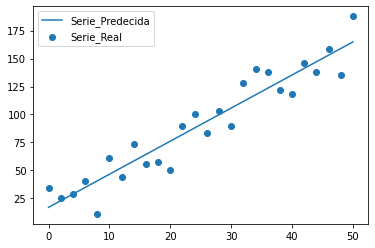

In [66]:
## TODO: Resuelve la regresión lineal con las funciones avanzadas de Numpy
## Usa nuevos nombres de variables como np_x_avg, np_x_std, np_r2, etc.
import math
np_n = len(X)
np_XY=np.dot(X,Y)
np_X2 =np.sum(np.square(X))
np_m = (np_XY-np.sum(X)*np.sum(Y)/np_n)/(np_X2-pow(np.sum(X),2)/np_n)
np_b = np.average(Y)-np_m*np.average(X)
np_covarXY = np.cov(X,Y)

np_r2 = np_covarXY[0][1]/(math.sqrt(np.var(X)*np.var(Y)))
np_Ypredic = X*np_m+np_b

plt.scatter(X,Y,label ='Serie_Real')
plt.plot(X,np_Ypredic, label = 'Serie_Predecida')
plt.legend()
plt.draw()

## Tarea 4: Calcula los residuos y realiza predicciones

Calcula los residuos de tu modelo:

$residuos = Y - Y\_pred$

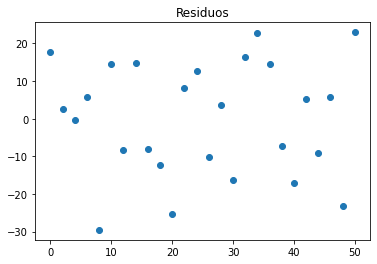

In [ ]:
## TODO: Calcula los residuos y represéntalos con Matplotlib en una gráfica de puntos vs X

res = Y-y_pred
plt.scatter(X,res)
plt.title("Residuos")
plt.draw()
# Gráfica de Matplotlib

Realiza predicciones para 2 (o más) valores nuevos de X, 1 valor para interpolación y 1 valor para extrapolación.

In [ ]:
# TODO: Realiza predicciones con el modelo ajustado

x_interpol = 17
y_interpol = x_interpol*m+b

x_extrapol = 70
y_extrapol = x_extrapol*m+b

print(y_interpol)
print(y_extrapol)

67.28715042735045
224.03569230769224


## Tarea 5: Resolución con Scikit-learn

*¿Te atreves a resolver una regresión lineal simple usando Scikit-learn? ¿Y a evalularla y realizar predicciones?*

Revisa el código de este notebook y adáptalo para usar nuestros datos: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Coefficients: 
 [2.95751966]
Coefficient of determination: 0.90


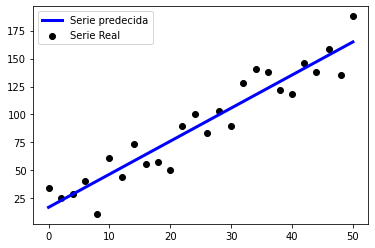

In [67]:
from sklearn import metrics
import sklearn
# TODO: Resuelve la regresión lineal simple usando Scikit-learn a partir de dicho ejemplo
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

l_regresion = linear_model.LinearRegression()
aux = X.reshape(-1,1)
l_regresion.fit(aux,Y)
SL_Y_predicted = l_regresion.predict(aux)
print("Coefficients: \n", l_regresion.coef_)


# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, SL_Y_predicted))

# Plot outputs
plt.scatter(X, Y, color="black",label ="Serie Real")
plt.plot(X, SL_Y_predicted, color="blue", linewidth=3,label= "Serie predecida")
plt.legend()


plt.show()